In [1]:
#importing the dataset and splitting into test and train
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 4s 0us/step


In [2]:
print("Training data shape: ", x_train.shape) 
print("Test data shape", x_test.shape) 

# Flattening the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)



Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [3]:
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) 

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]


In [4]:
import keras
num_classes = 10
#Converts a class vector (integers) to binary class matrix.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
from keras.layers import Dense 
from keras.models import Sequential 

In [6]:
image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='relu', input_shape=(image_size,)))

#making a model with one hidden layer with activation relu
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 15)                495       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
Total params: 25,775
Trainable params: 25,775
Non-trainable params: 0
_________________________________________________________________




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 2s 33us/step - loss: 4.6195 - acc: 0.2191 - val_loss: 2.1121 - val_acc: 0.1888
Epoch 2/30
54000/54000 [==============================] - 1s 19us/step - loss: 1.9730 - acc: 0.2910 - val_loss: 1.9159 - val_acc: 0.2742
Epoch 3/30
54000/54000 [==============================] - 1s 19us/step - loss: 1.8299 - acc: 0.3424 - val_loss: 1.6760 - val_acc: 0.3928
Epoch 4/30
54000/54000 [==============================] - 1s 19us/step - loss: 1.6849 - acc: 0.3932 - val_loss: 1.5923 - val_acc: 0.4107
Epoch 5/30
54000/54000 [==============================] - 1s 19us/step - loss: 1.5721 - acc: 0.4229 - val_loss: 1.4748 - val_acc: 0.4563
Epoch 6/30
54000/54000 [==============================] - 1s 18us/step - loss: 1.3504 - acc: 0.5064 - val_loss: 1.2187 - val_acc: 0.6693
Epoch 7/30
54000/54000 [========

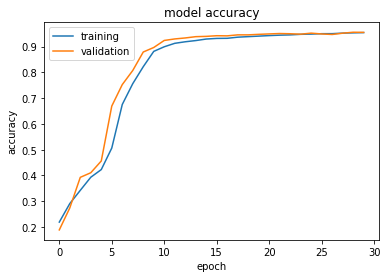

Test loss: 0.229
Test accuracy: 0.944


In [7]:
import matplotlib.pyplot as plt
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')